# **Exploratory Data Analysis On Retail Sales Data**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

**1. Loading and Cleanig Data**

In [ ]:
#Data loading
sd = pd.read_csv('/content/retail_sales_dataset.csv')


In [ ]:
#preview the data
sd.head()
sd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Transaction ID    1000 non-null   int64 
 1   Date              1000 non-null   object
 2   Customer ID       1000 non-null   object
 3   Gender            1000 non-null   object
 4   Age               1000 non-null   int64 
 5   Product Category  1000 non-null   object
 6   Quantity          1000 non-null   int64 
 7   Price per Unit    1000 non-null   int64 
 8   Total Amount      1000 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 70.4+ KB


In [ ]:
#cleaning data
sd.dropna(inplace  = True)

**2. Descriptive statistics**

In [ ]:
#basic stats
print(sd.describe())

       Transaction ID         Age     Quantity  Price per Unit  Total Amount
count     1000.000000  1000.00000  1000.000000     1000.000000   1000.000000
mean       500.500000    41.39200     2.514000      179.890000    456.000000
std        288.819436    13.68143     1.132734      189.681356    559.997632
min          1.000000    18.00000     1.000000       25.000000     25.000000
25%        250.750000    29.00000     1.000000       30.000000     60.000000
50%        500.500000    42.00000     3.000000       50.000000    135.000000
75%        750.250000    53.00000     4.000000      300.000000    900.000000
max       1000.000000    64.00000     4.000000      500.000000   2000.000000


In [ ]:
#mode for each column
print(sd.mode().iloc[0])

Transaction ID               1
Date                2023-05-16
Customer ID            CUST001
Gender                  Female
Age                       43.0
Product Category      Clothing
Quantity                   4.0
Price per Unit            50.0
Total Amount              50.0
Name: 0, dtype: object


**3.Time Series Analysis**

In [ ]:
sd.head()

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100


In [ ]:
#covert datetime
sd['Date']= pd.to_datetime(sd['Date'])

In [ ]:
#aggregate sales over time
sales_trends = sd.groupby('Date')['Total Amount'].sum().reset_index()
print(sales_trends)

          Date  Total Amount
0   2023-01-01          3600
1   2023-01-02          1765
2   2023-01-03           600
3   2023-01-04          1240
4   2023-01-05          1100
..         ...           ...
340 2023-12-27           700
341 2023-12-28          2075
342 2023-12-29          3400
343 2023-12-31            50
344 2024-01-01          1530

[345 rows x 2 columns]


Text(0.5, 1.0, 'Sales Trends Over Time')

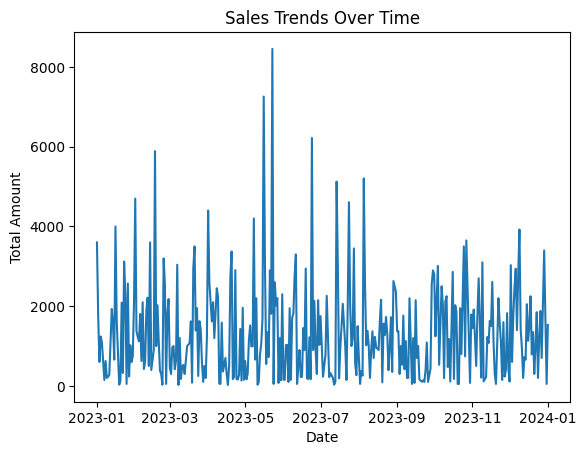

In [ ]:
# Plot
plt.plot(sales_trends['Date'],sales_trends['Total Amount'])
plt.xlabel('Date')
plt.ylabel('Total Amount')
plt.title('Sales Trends Over Time')

**4. Customer and Product Analysis**

In [ ]:
#demographics
customer_demographics = sd.groupby('Age')['Total Amount'].sum().reset_index()
print(customer_demographics)

    Age  Total Amount
0    18         11215
1    19         14870
2    20          8645
3    21         12585
4    22         13700
5    23          8220
6    24          5415
7    25          9900
8    26         13980
9    27          9385
10   28          8670
11   29          6570
12   30          9790
13   31         10220
14   32          5550
15   33          6240
16   34         16785
17   35         11290
18   36          9105
19   37         11650
20   38         11100
21   39          4595
22   40          9415
23   41          5650
24   42          8500
25   43         17970
26   44          7560
27   45          6325
28   46         13090
29   47         12505
30   48          7240
31   49          5110
32   50          9845
33   51         16065
34   52          7040
35   53          9510
36   54         10505
37   55          9780
38   56          9440
39   57          9290
40   58          7395
41   59          9470
42   60         11590
43   61          6730
44   62   

<function matplotlib.pyplot.show(close=None, block=None)>

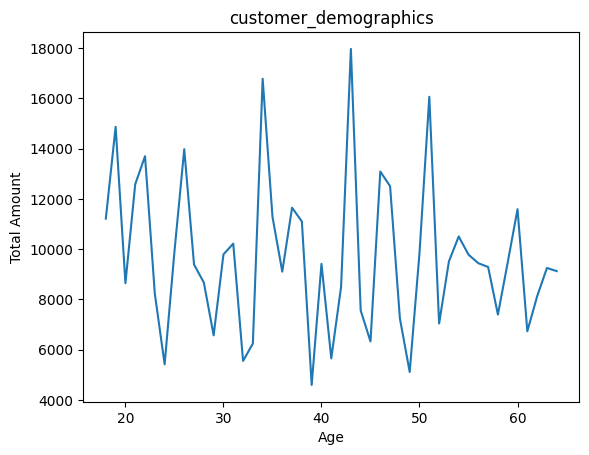

In [ ]:
plt.plot(customer_demographics['Age'],customer_demographics['Total Amount'])
plt.title('customer_demographics')
plt.xlabel('Age')
plt.ylabel('Total Amount')
plt.show

<Axes: xlabel='Age'>

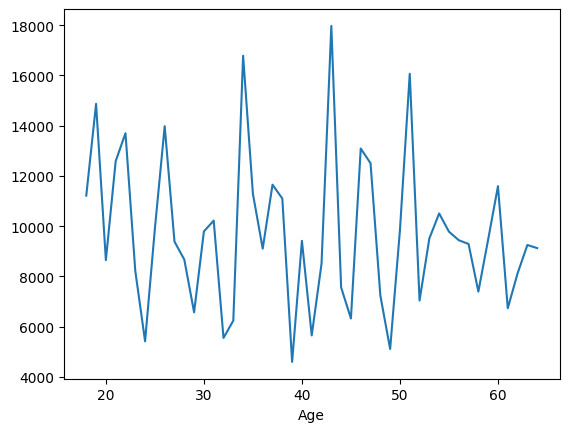

In [ ]:
# Average purchase by age
sd.groupby('Age')['Total Amount'].sum().plot(kind='line')


[]

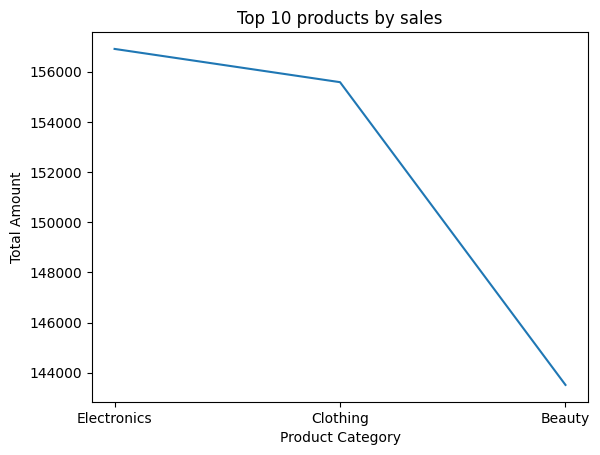

In [ ]:
# Top 10 products by sales
Product_by_sales = sd.groupby('Product Category')['Total Amount'].sum().nlargest(10).reset_index()
plt.plot(Product_by_sales['Product Category'],Product_by_sales['Total Amount'])
plt.title('Top 10 products by sales')
plt.xlabel('Product Category')
plt.ylabel('Total Amount')
plt.plot(kind ='bar', colour ='purple')

**5. Visualization: Bar Charts, Line Plots, Heatmaps***







Text(0, 0.5, 'Quantity')

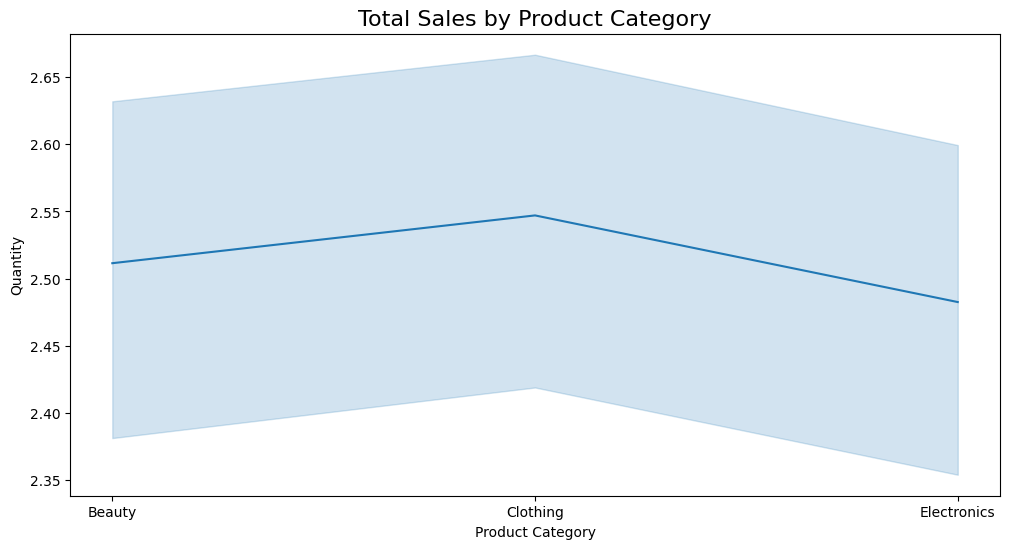

In [ ]:
#lineplot
plt.figure(figsize=(12,6))
sns.lineplot(x='Product Category', y = 'Quantity', data = sd)
plt.title('Total Sales by Product Category', fontsize = 16)
plt.xlabel('Product Category')
plt.ylabel('Quantity')

<ipython-input-25-3523461837>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Product Category', y='Total Amount', data=category_sales, palette='viridis')


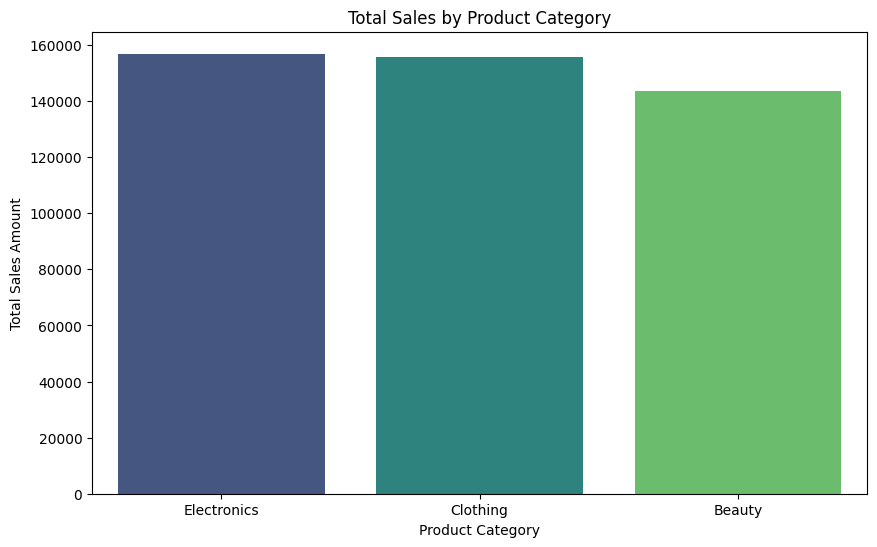

In [ ]:
#barplot
# Group by Product Category and sum the Total Amount
category_sales = sd.groupby('Product Category')['Total Amount'].sum().reset_index()

# Sort categories for better visualization (optional)
category_sales = category_sales.sort_values(by='Total Amount', ascending=False)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Product Category', y='Total Amount', data=category_sales, palette='viridis')
plt.title('Total Sales by Product Category')
plt.xlabel('Product Category')
plt.ylabel('Total Sales Amount')
plt.show()

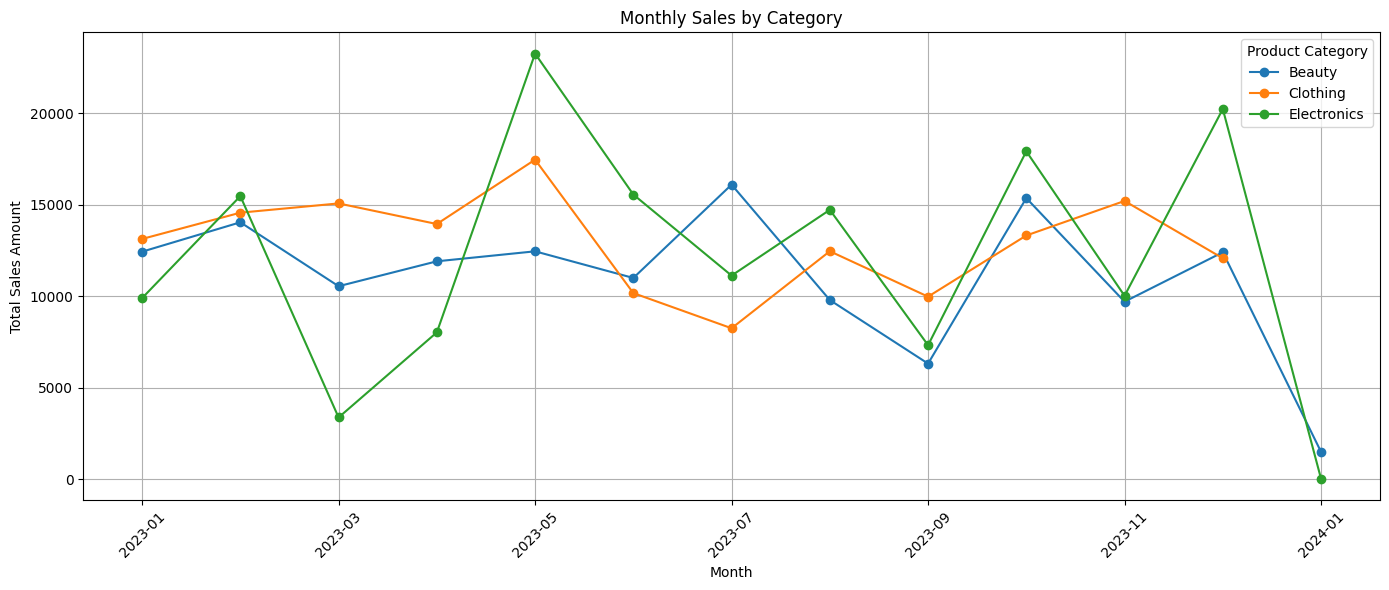

In [ ]:
# 1. Convert the date column to datetime (if not already)
sd['Date'] = pd.to_datetime(sd['Date'])

# 2. Create a 'month' column in 'YYYY-MM' format
sd['month'] = sd['Date'].dt.to_period('M').astype(str)

# 3. Now build the pivot and plot
pivot = sd.pivot_table(index='month', columns='Product Category', values='Total Amount', aggfunc='sum')

# 4. Plot the pivot
pivot.plot(figsize=(14, 6), marker='o')
plt.title("Monthly Sales by Category")
plt.xlabel("Month")
plt.ylabel("Total Sales Amount")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.legend(title="Product Category")
plt.show()



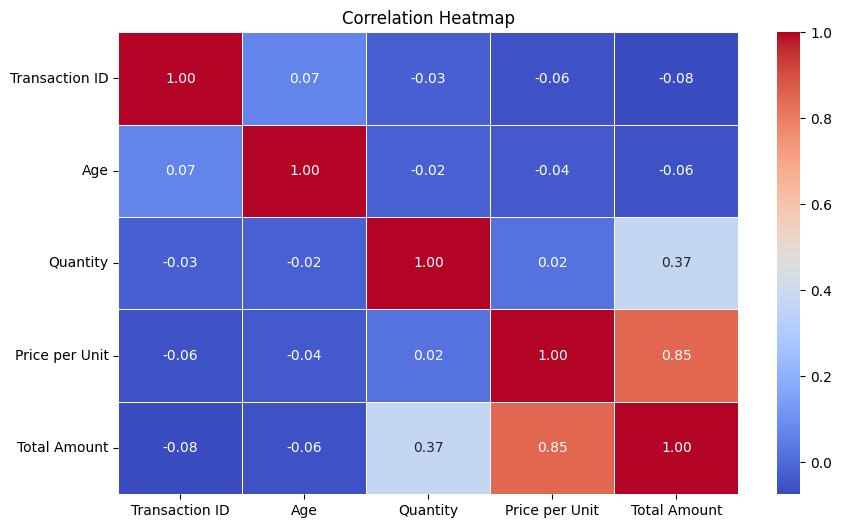

In [ ]:
#Compute the correlation matrix
corr_matrix = sd.corr(numeric_only=True)

# Step 5: Plot the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

# This analysis identifies Beauty as the strongest performer, Electronics as opportunity-rich but volatile, and Clothing as stable yet improvable. Clear seasonal trends and pricing impact were uncovered, providing the business with strategic levers for growth, efficiency, and engagement.